In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Juan Sebastian Buitrago Díaz

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [50]:
def derivada(f,x, tol = 1e-8):
  '''
  Encuentra el valor de la derivada con una tolerancia de 10^-8

  Entradas:
  f: La función función a derivar (debe ser llamable)
  x: El valor en el cual se evalúa la derivada

  Salidas:
  valor_derivada: El valor de la función derivada evaluada en x
  h_valores: Los valores del paso
  '''
  h=0.1
  h_valores=[]
  dev_0=0
  dev_1=(f(x+h)-f(x-h))/(2*h)
  err=abs(dev_0-dev_1)
  while err > tol:
    h=h/2
    h_valores.append(h)
    dev_0=dev_1
    dev_1=(f(x+h)-f(x-h))/(2*h)
    err=abs(dev_0-dev_1)
  valor_derivada=dev_1
  return valor_derivada, h_valores

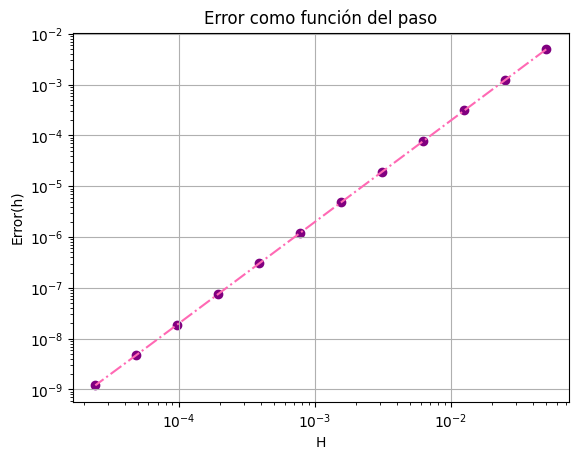

In [63]:
f=lambda x:3**x
df,h_valores=derivada(f,2)
error= [abs((np.log(3)*3**2)-(f(2+h)-f(2-h))/(2*h)) for h in h_valores]

plt.loglog(h_valores,error,color="hotpink",ls="-.")
plt.scatter(h_valores,error,color="purple")
plt.title("Error como función del paso")
plt.xlabel("H")
plt.ylabel("Error(h)")
plt.grid()
plt.show()

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [ ]:
# Aquí va su código

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [82]:
def integral_z(y,x):
  '''
  Encuentra el valor de la integral interior

  Entradas:
  x: Una de las variables a integrar
  y: La otra variable a integrar

  Salidas:
  El valor de dicha integral
  '''
  itg=lambda z: z*x*y
  return quad(itg,0,1-x-y)[0]

def integral_y(x):
  '''
  Encuentra el valor de la integral interior

  Entradas:
  x: La variable a integrar

  Salidas:
  El valor de dicha integral
  '''
  itg = lambda y: integral_z(y,x)
  return quad(itg,0,1-x)[0]

print(f'El valor de la masa encontrado con el metodo tplquad {(quad(integral_y,0,1))[0]}')

El valor de la masa encontrado con el metodo tplquad 0.001388888888888889


In [83]:
f=lambda z,y,x:x*y*z
print(f'El valor de la masa encontrado con el metodo tplquad {(tplquad(f,0,1,0,lambda x:1-x,0,lambda x,y:1-x-y))[0]}')

El valor de la masa encontrado con el metodo tplquad 0.001388888888888889


In [85]:
f=lambda z,y,x:((x**2)+(y**2))*x*y*z
print(f'El momento de inercia en el eje Z encontrado con el metodo tplquad {(tplquad(f,0,1,0,lambda x:1-x,0,lambda x,y:1-x-y))[0]}')

El momento de inercia en el eje Z encontrado con el metodo tplquad 0.00029761904761904765
